In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [19]:
from google.colab import files

uploaded = files.upload()


Saving Global_Music_Streaming_Listener_Preferences.csv to Global_Music_Streaming_Listener_Preferences (2).csv


In [20]:
import pandas as pd

# Load dataset
df = pd.read_csv("Global_Music_Streaming_Listener_Preferences.csv")


df.head()


,User_ID,Age,Country,Streaming Platform,Top Genre,Minutes Streamed Per Day,Number of Songs Liked,Most Played Artist,Subscription Type,Listening Time (Morning/Afternoon/Night),Discover Weekly Engagement (%),Repeat Song Rate (%)
0,U1000,34,Japan,Tidal,Reggae,295,138,Adele,Free,Afternoon,47.42,16.74
1,U1001,24,Germany,Deezer,Country,86,388,Ed Sheeran,Premium,Night,12.06,69.25
2,U1002,49,Germany,Deezer,Pop,363,368,Post Malone,Premium,Afternoon,47.19,67.38
3,U1003,55,Australia,YouTube,Reggae,348,349,Dua Lipa,Premium,Morning,31.27,76.51
4,U1004,13,Germany,Amazon Music,Reggae,30,328,Adele,Free,Night,30.68,43.41


In [21]:
# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

# Remove duplicates if any
df.drop_duplicates(inplace=True)

# Remove unnecessary column
df.drop(columns=["User_ID"], inplace=True, errors="ignore")
df.head()

# Display dataset info
df.info()


Missing values per column:
 User_ID                                     0
Age                                         0
Country                                     0
Streaming Platform                          0
Top Genre                                   0
Minutes Streamed Per Day                    0
Number of Songs Liked                       0
Most Played Artist                          0
Subscription Type                           0
Listening Time (Morning/Afternoon/Night)    0
Discover Weekly Engagement (%)              0
Repeat Song Rate (%)                        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Age                                       5000 non-null   int64  
 1   Country                                   5000 non-null   object 
 2   Streaming P

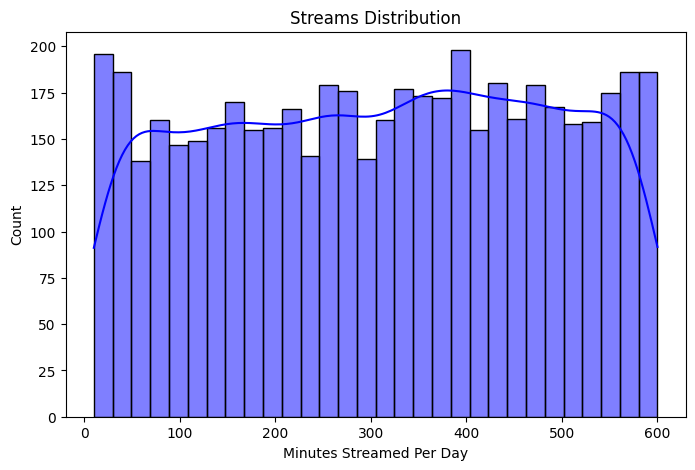

<ipython-input-22-4ccf3d2edad2>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




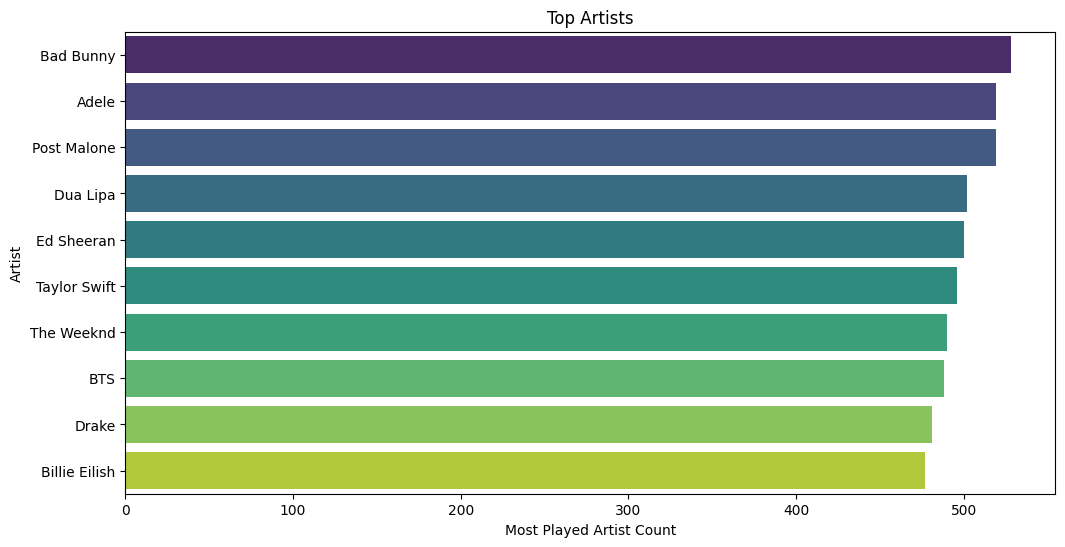

<ipython-input-22-4ccf3d2edad2>:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




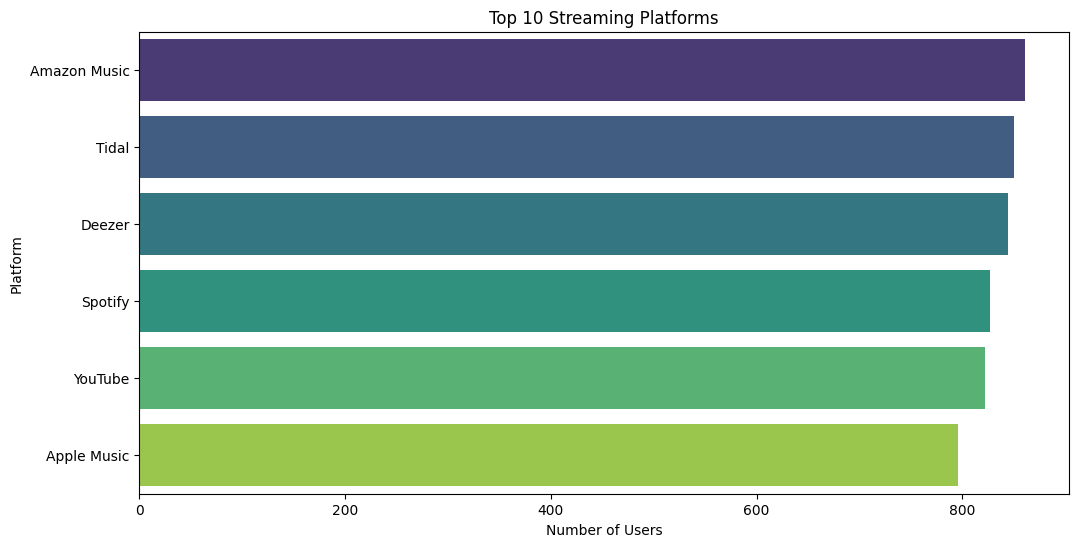

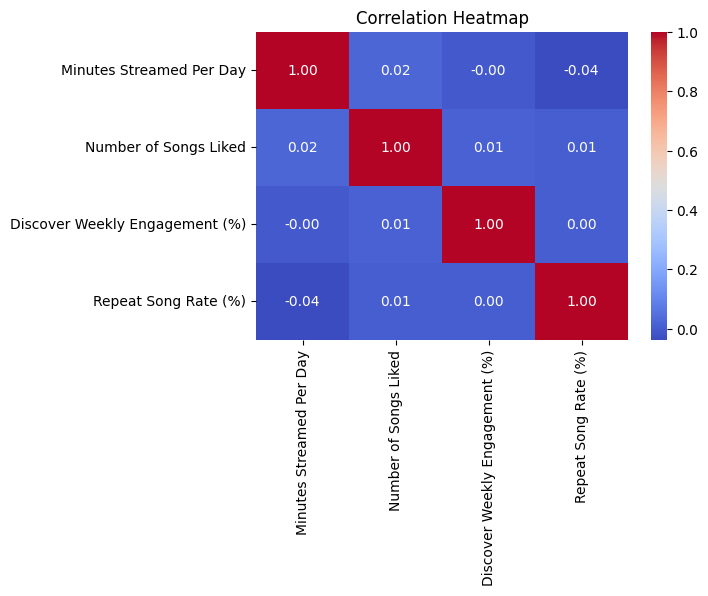

In [22]:

import plotly.express as px

# 1️⃣ Streams Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Minutes Streamed Per Day'], bins=30, kde=True, color='blue')
plt.title('Streams Distribution')
plt.show()

# 2️⃣ Top Artist
top_artists = df['Most Played Artist'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')
plt.title("Top Artists")
plt.xlabel("Most Played Artist Count")
plt.ylabel("Artist")
plt.show()

# 3️⃣ Top Platforms
top_platforms = df['Streaming Platform'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_platforms.values, y=top_platforms.index, palette='viridis')
plt.title("Top 10 Streaming Platforms")
plt.xlabel("Number of Users")
plt.ylabel("Platform")
plt.show()

# 🌍 4️⃣ Top Regions (World Map)
# Aggregate user counts by country
top_countries = df['Country'].value_counts().reset_index()
top_countries.columns = ['Country', 'Users']

# Plot choropleth map
fig = px.choropleth(top_countries,
                     locations="Country",
                     locationmode="country names",
                     color="Users",
                     title="Top Streaming Regions (World Map)",
                     color_continuous_scale="Viridis")

fig.show()

# 5️⃣ Correlation Heatmap
corr = df[['Minutes Streamed Per Day', 'Number of Songs Liked', 'Discover Weekly Engagement (%)', 'Repeat Song Rate (%)']].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [23]:
df.to_csv("cleaned_music_data.csv", index=False)


In [24]:
from google.colab import files
files.download('cleaned_music_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
# Select Features & Target
X = df[['Minutes Streamed Per Day', 'Number of Songs Liked']]
y = df['Repeat Song Rate (%)']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train RandomForest Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions & R² Score
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("Model R² Score:", r2)


Model R² Score: -0.21346036275611047


<ipython-input-26-696fea1d17ca>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




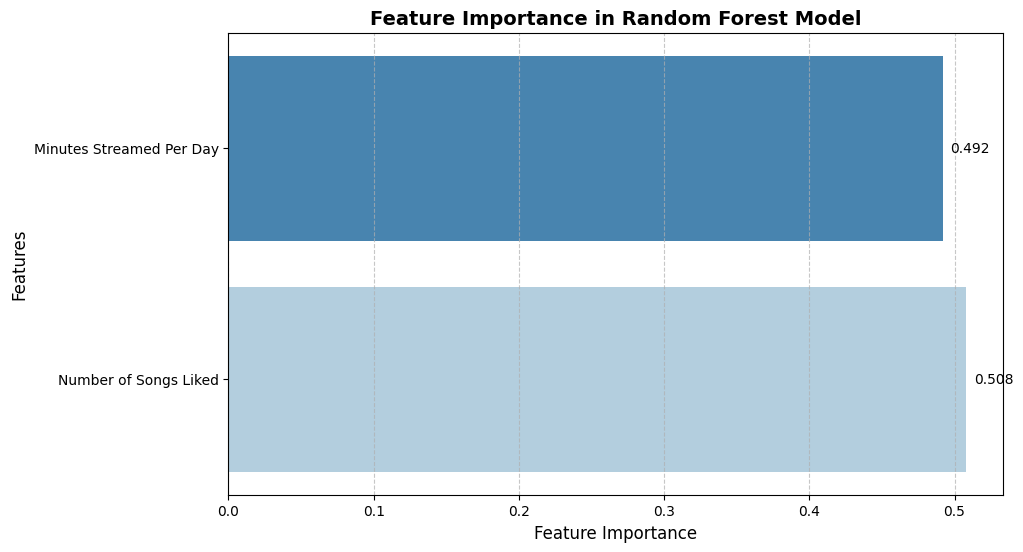

In [26]:

# Get feature importance
feature_importance = model.feature_importances_

# Sort feature importance
sorted_idx = np.argsort(feature_importance)
sorted_features = np.array(X.columns)[sorted_idx]
sorted_importance = feature_importance[sorted_idx]

# Plot Feature Importance (Enhanced)
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importance, y=sorted_features, palette="Blues_r")

# Improve aesthetics
plt.xlabel("Feature Importance", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.title("Feature Importance in Random Forest Model", fontsize=14, fontweight='bold')

# Add value labels
for i, v in enumerate(sorted_importance):
    plt.text(v + 0.005, i, f"{v:.3f}", va='center', fontsize=10)

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()
